<a href="https://colab.research.google.com/github/jfink09/Financial-Modeling/blob/Machine-Learning/Predict_Stock_Prices_For_TA_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install Yahoo Finance
!pip install -q yfinance

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import warnings
from matplotlib import style

# Style charts
%matplotlib inline 
%config InclineBackend.figure_format = 'retina'

plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [16, 10]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Get SPY's stock data
SPY = yf.download('SPY', start='2020-01-01', end='2020-07-28', progress=False)
SPY

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,323.540009,324.890015,322.529999,324.869995,321.555786,59151200
2020-01-03,321.160004,323.640015,321.100006,322.410004,319.120911,77709700
2020-01-06,320.489990,323.730011,320.359985,323.640015,320.338379,55653900
2020-01-07,323.019989,323.540009,322.239990,322.730011,319.437653,40496400
2020-01-08,322.940002,325.779999,322.670013,324.450012,321.140106,68296000
...,...,...,...,...,...,...
2020-07-21,326.450012,326.929993,323.940002,325.010010,325.010010,57499000
2020-07-22,324.619995,327.200012,324.500000,326.859985,326.859985,57792900
2020-07-23,326.470001,327.230011,321.480011,322.959991,322.959991,75738000


In [4]:
# Extract the close prices from the data table
close = SPY['Adj Close']                                # Set the close prices equal to the 'Adj Close' column
close.index = pd.to_datetime(close.index)               # Set the index for the close prices to be the dates so that we have datetime values for the chart
close  

Date
2020-01-02    321.555786
2020-01-03    319.120911
2020-01-06    320.338379
2020-01-07    319.437653
2020-01-08    321.140106
                 ...    
2020-07-21    325.010010
2020-07-22    326.859985
2020-07-23    322.959991
2020-07-24    320.880005
2020-07-27    323.220001
Name: Adj Close, Length: 143, dtype: float64

<function matplotlib.pyplot.show>

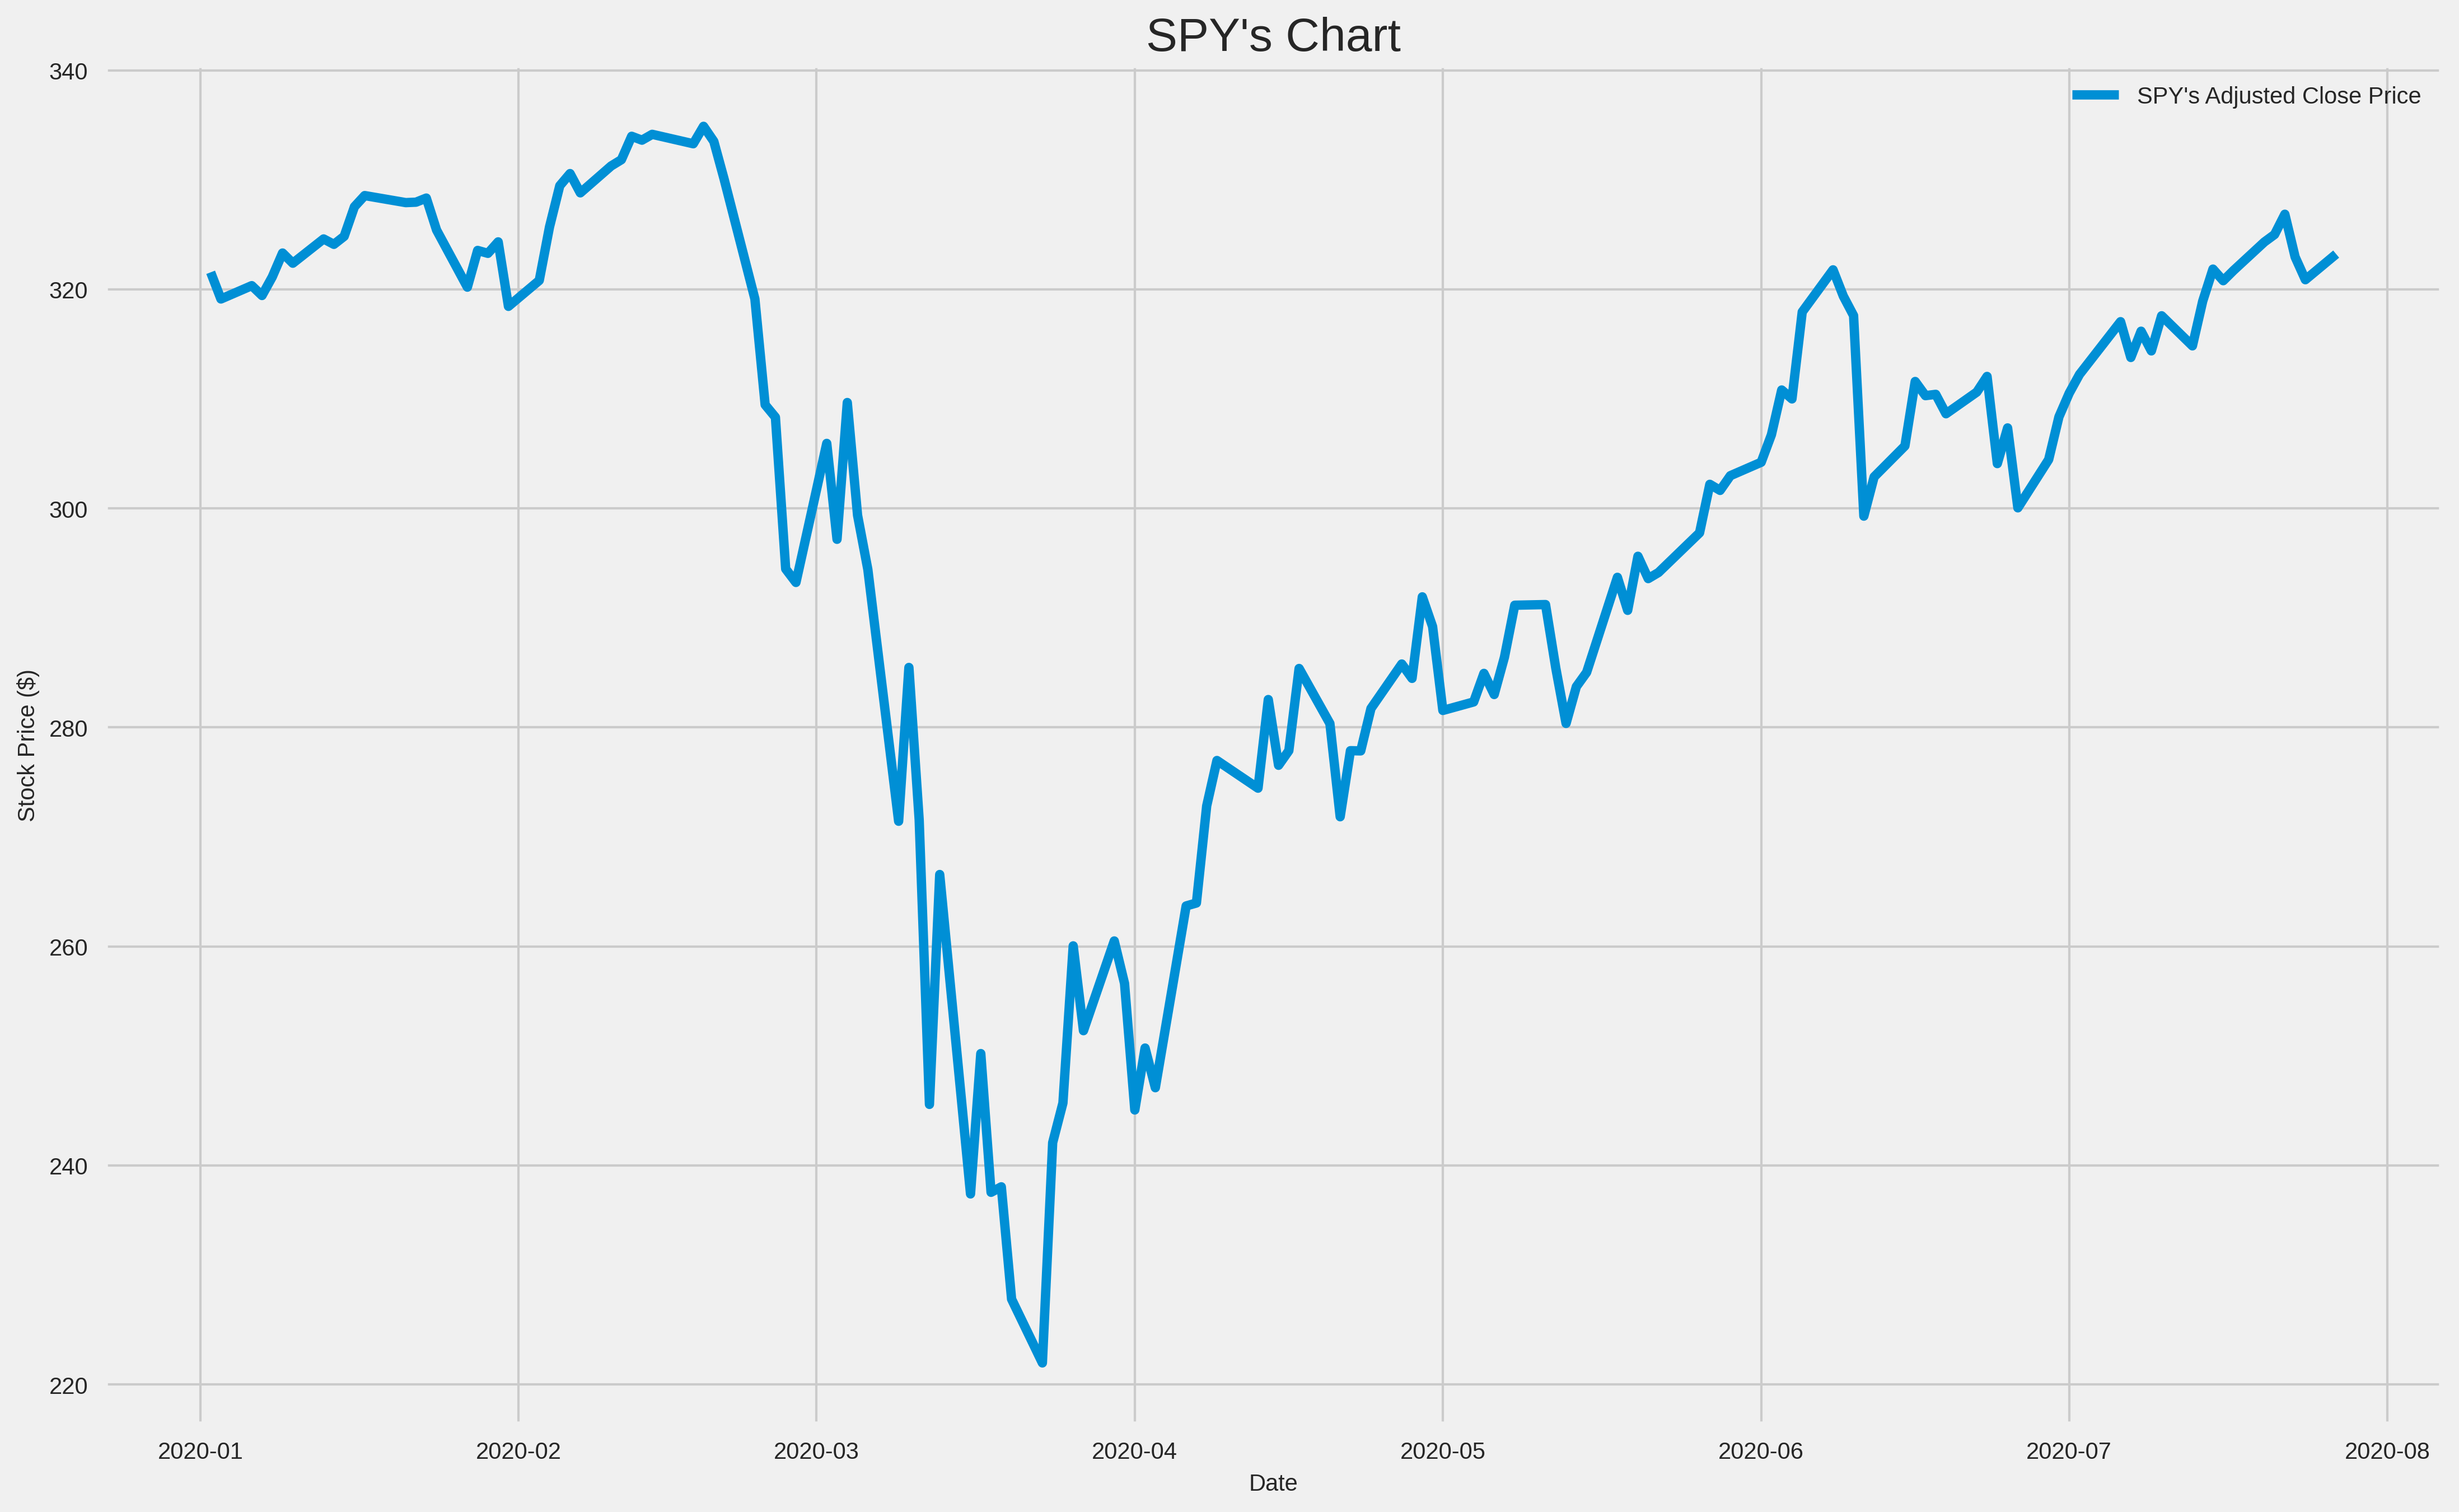

In [5]:
# Plot SPY's chart
plt.style.use('fivethirtyeight')                          # Use fivethirtyeight chart style
plt.plot(close, label="SPY's Adjusted Close Price")       # Plot the close prices
plt.title("SPY's Chart")                                  # Give the plot a title
plt.xlabel('Date', fontsize=10)                           # Label x-axis
plt.ylabel('Stock Price ($)', fontsize=10)                # Label y-axis

plt.legend()                                              # Add a legend
plt.tight_layout                                          # Tight layout format
plt.show                                                  # Show chart

In [6]:
# Change SPY's datatable to be indexed
SPY.reset_index(drop=False, inplace=True)                 
SPY

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,323.540009,324.890015,322.529999,324.869995,321.555786,59151200
1,2020-01-03,321.160004,323.640015,321.100006,322.410004,319.120911,77709700
2,2020-01-06,320.489990,323.730011,320.359985,323.640015,320.338379,55653900
3,2020-01-07,323.019989,323.540009,322.239990,322.730011,319.437653,40496400
4,2020-01-08,322.940002,325.779999,322.670013,324.450012,321.140106,68296000
...,...,...,...,...,...,...,...
138,2020-07-21,326.450012,326.929993,323.940002,325.010010,325.010010,57499000
139,2020-07-22,324.619995,327.200012,324.500000,326.859985,326.859985,57792900
140,2020-07-23,326.470001,327.230011,321.480011,322.959991,322.959991,75738000
141,2020-07-24,320.950012,321.989990,319.250000,320.880005,320.880005,73766600


In [7]:
# Extract the volume and date data
volume = SPY['Volume']
date = SPY['Date']

<function matplotlib.pyplot.show>

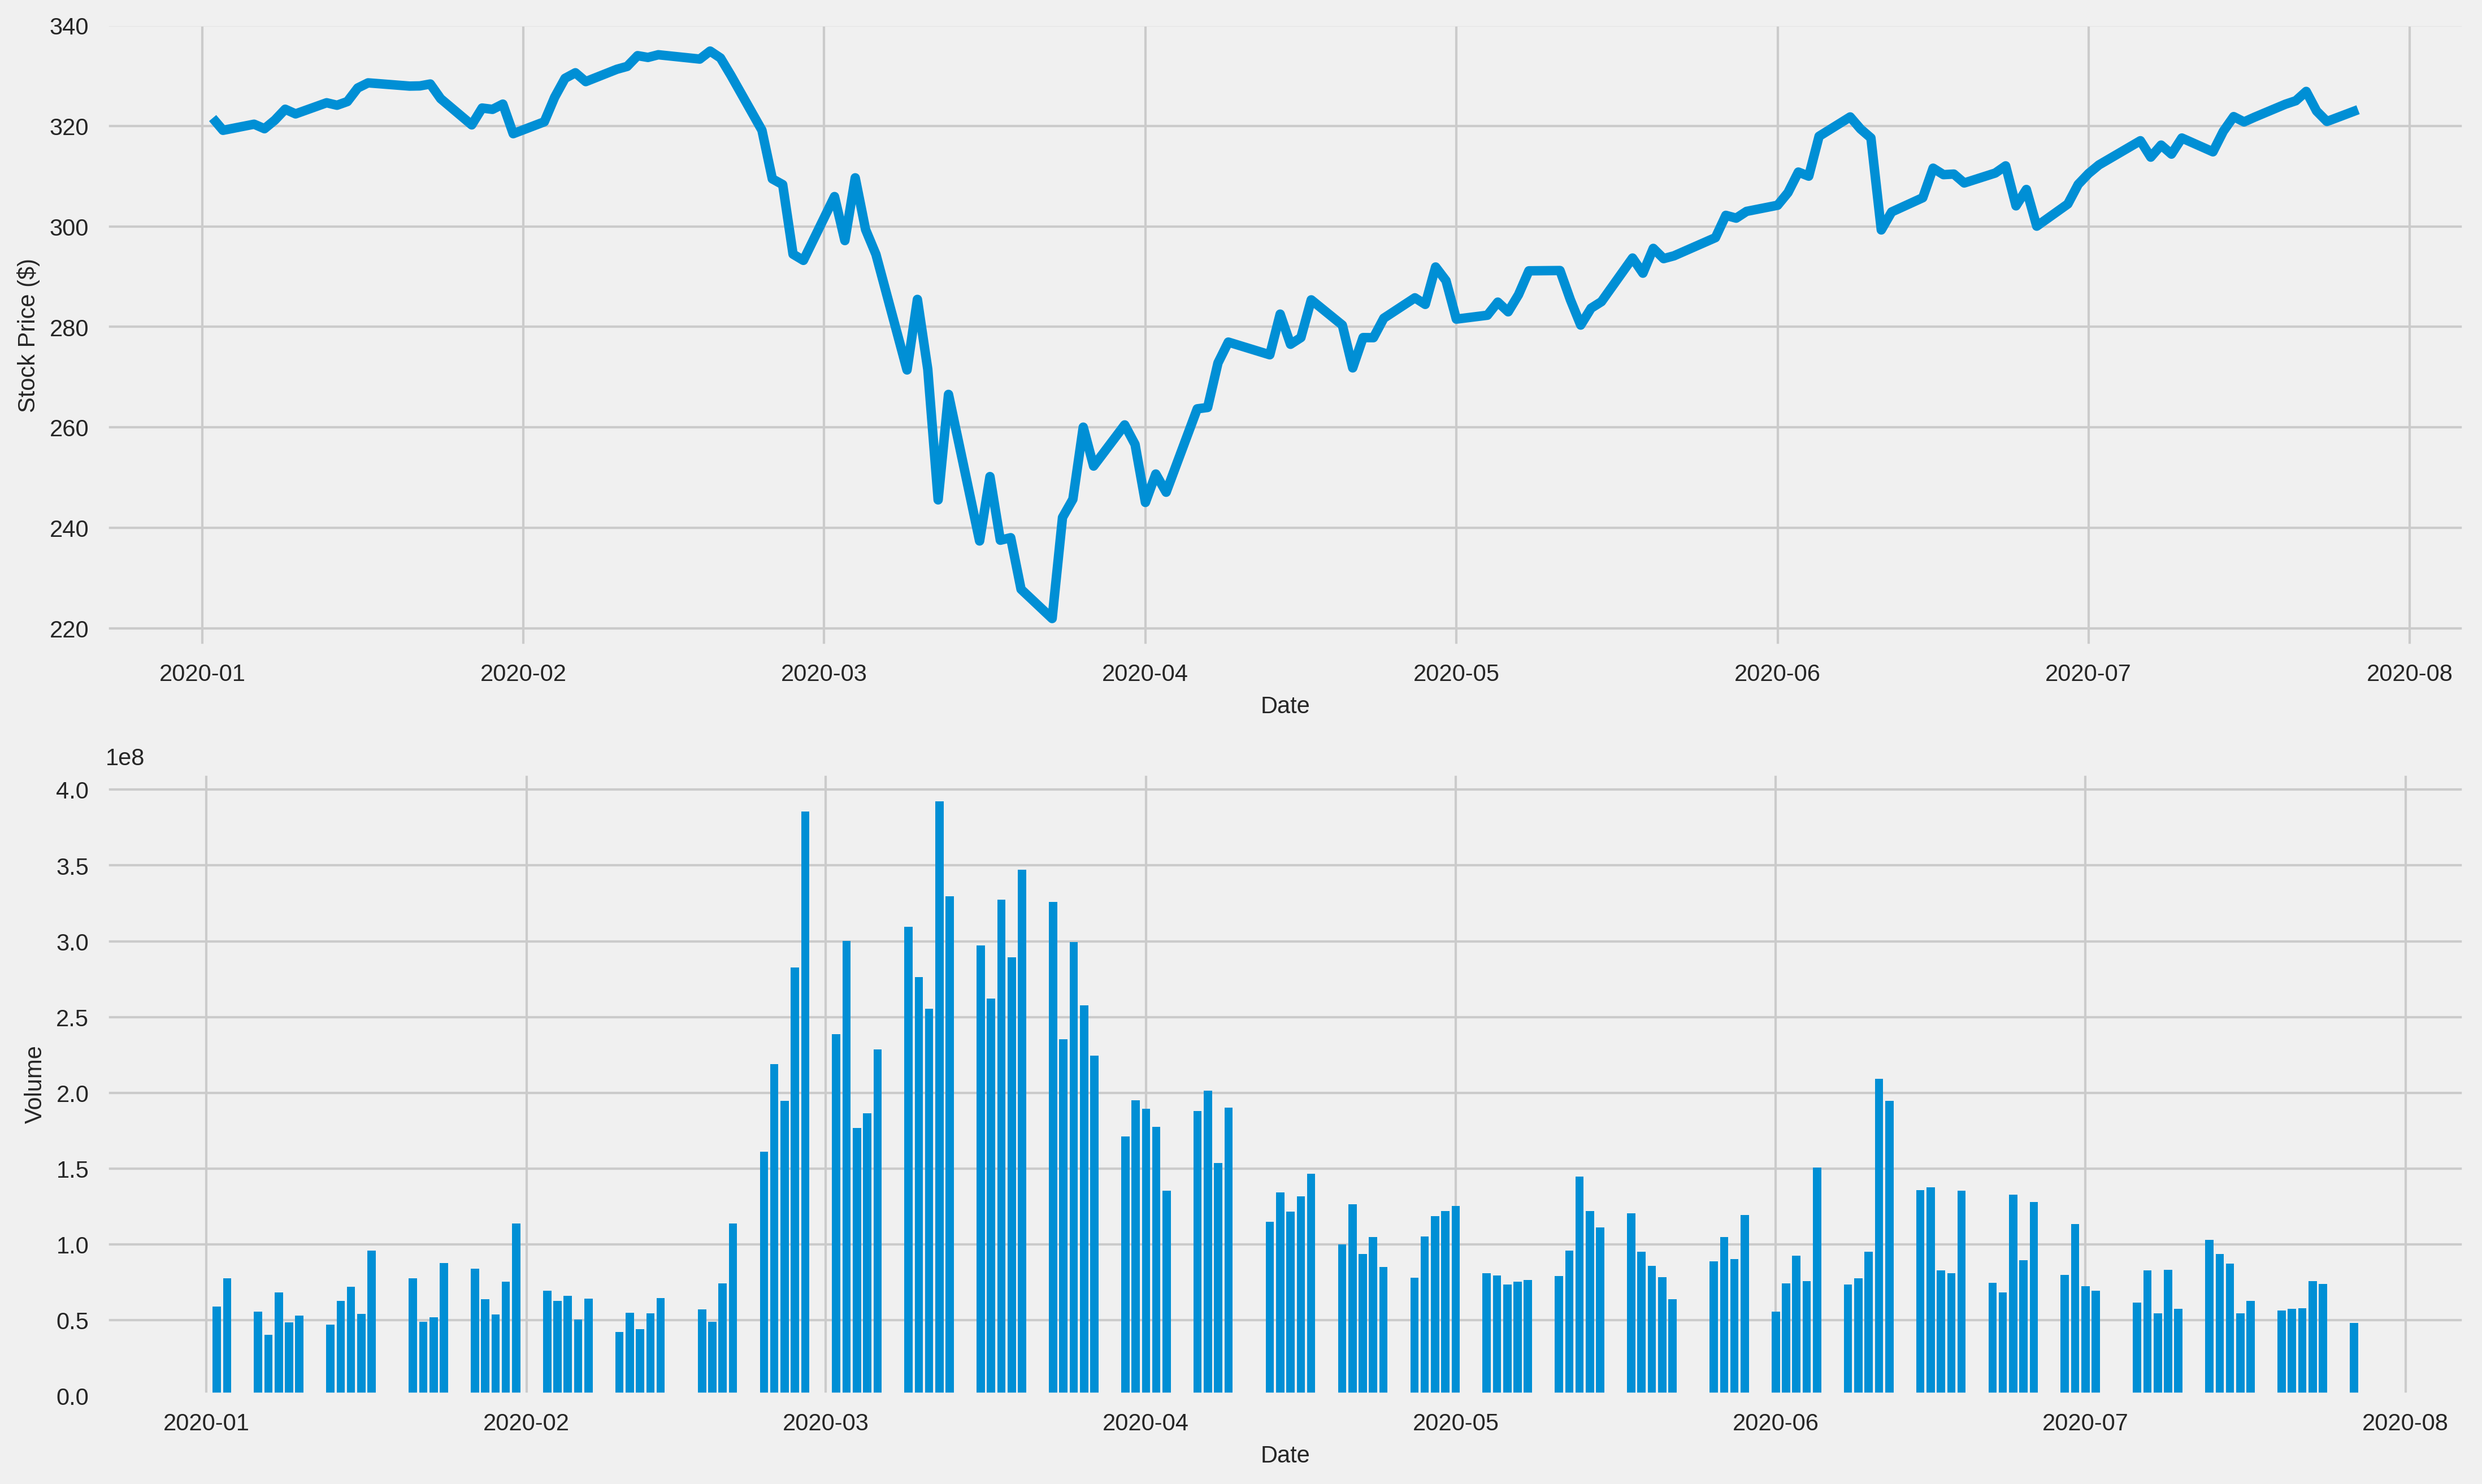

In [8]:
# Plot SPY's chart with volume
plt.style.use('fivethirtyeight')                        # Use fivethirtyeight chart style

plt.subplot(211)                                        # SPY's price chart
plt.plot(close, label="SPY's Adjusted Close Price")     # Plot the closing prices
plt.xlabel('Date', fontsize=10)
plt.ylabel('Stock Price ($)', fontsize=10)

plt.subplot(212)                                        # Volume chart
plt.xlabel('Date', fontsize=10)                         # Label x-axis
plt.ylabel('Volume', fontsize=10)                       # Label y-axis
plt.bar(date, volume)                                   # Plot the volume as a bar chart 

plt.tight_layout                                        # Tight layout format
plt.show                                                # Show chart

# can use the code: plt.figure(figsize = (16,10)) to set the figure size if not done in the beginning of the code

In [9]:
# Calculate the 50 day and 100 day simple moving averages for the stock price
sma50_for_chart = close.rolling(window=50).mean()            
sma100_for_chart = close.rolling(window=100).mean()

sma50_for_chart.tail(10)      # Show the last 10 values for the 50 day moving average

Date
2020-07-14    303.313920
2020-07-15    304.104368
2020-07-16    304.821446
2020-07-17    305.595754
2020-07-20    306.353762
2020-07-21    307.030788
2020-07-22    307.743618
2020-07-23    308.494537
2020-07-24    309.304813
2020-07-27    310.094783
Name: Adj Close, dtype: float64

In [10]:
# Calculate the 50 day simple moving average for the stock volume
sma50_for_volume = volume.rolling(50).mean()
sma50_for_volume.tail(10)     # Show the last 10 values for the 50 day moving average

133    96448002.0
134    96574468.0
135    96075520.0
136    95858366.0
137    95479534.0
138    95097072.0
139    94672326.0
140    94269670.0
141    92850580.0
142    91376882.0
Name: Volume, dtype: float64

<function matplotlib.pyplot.show>

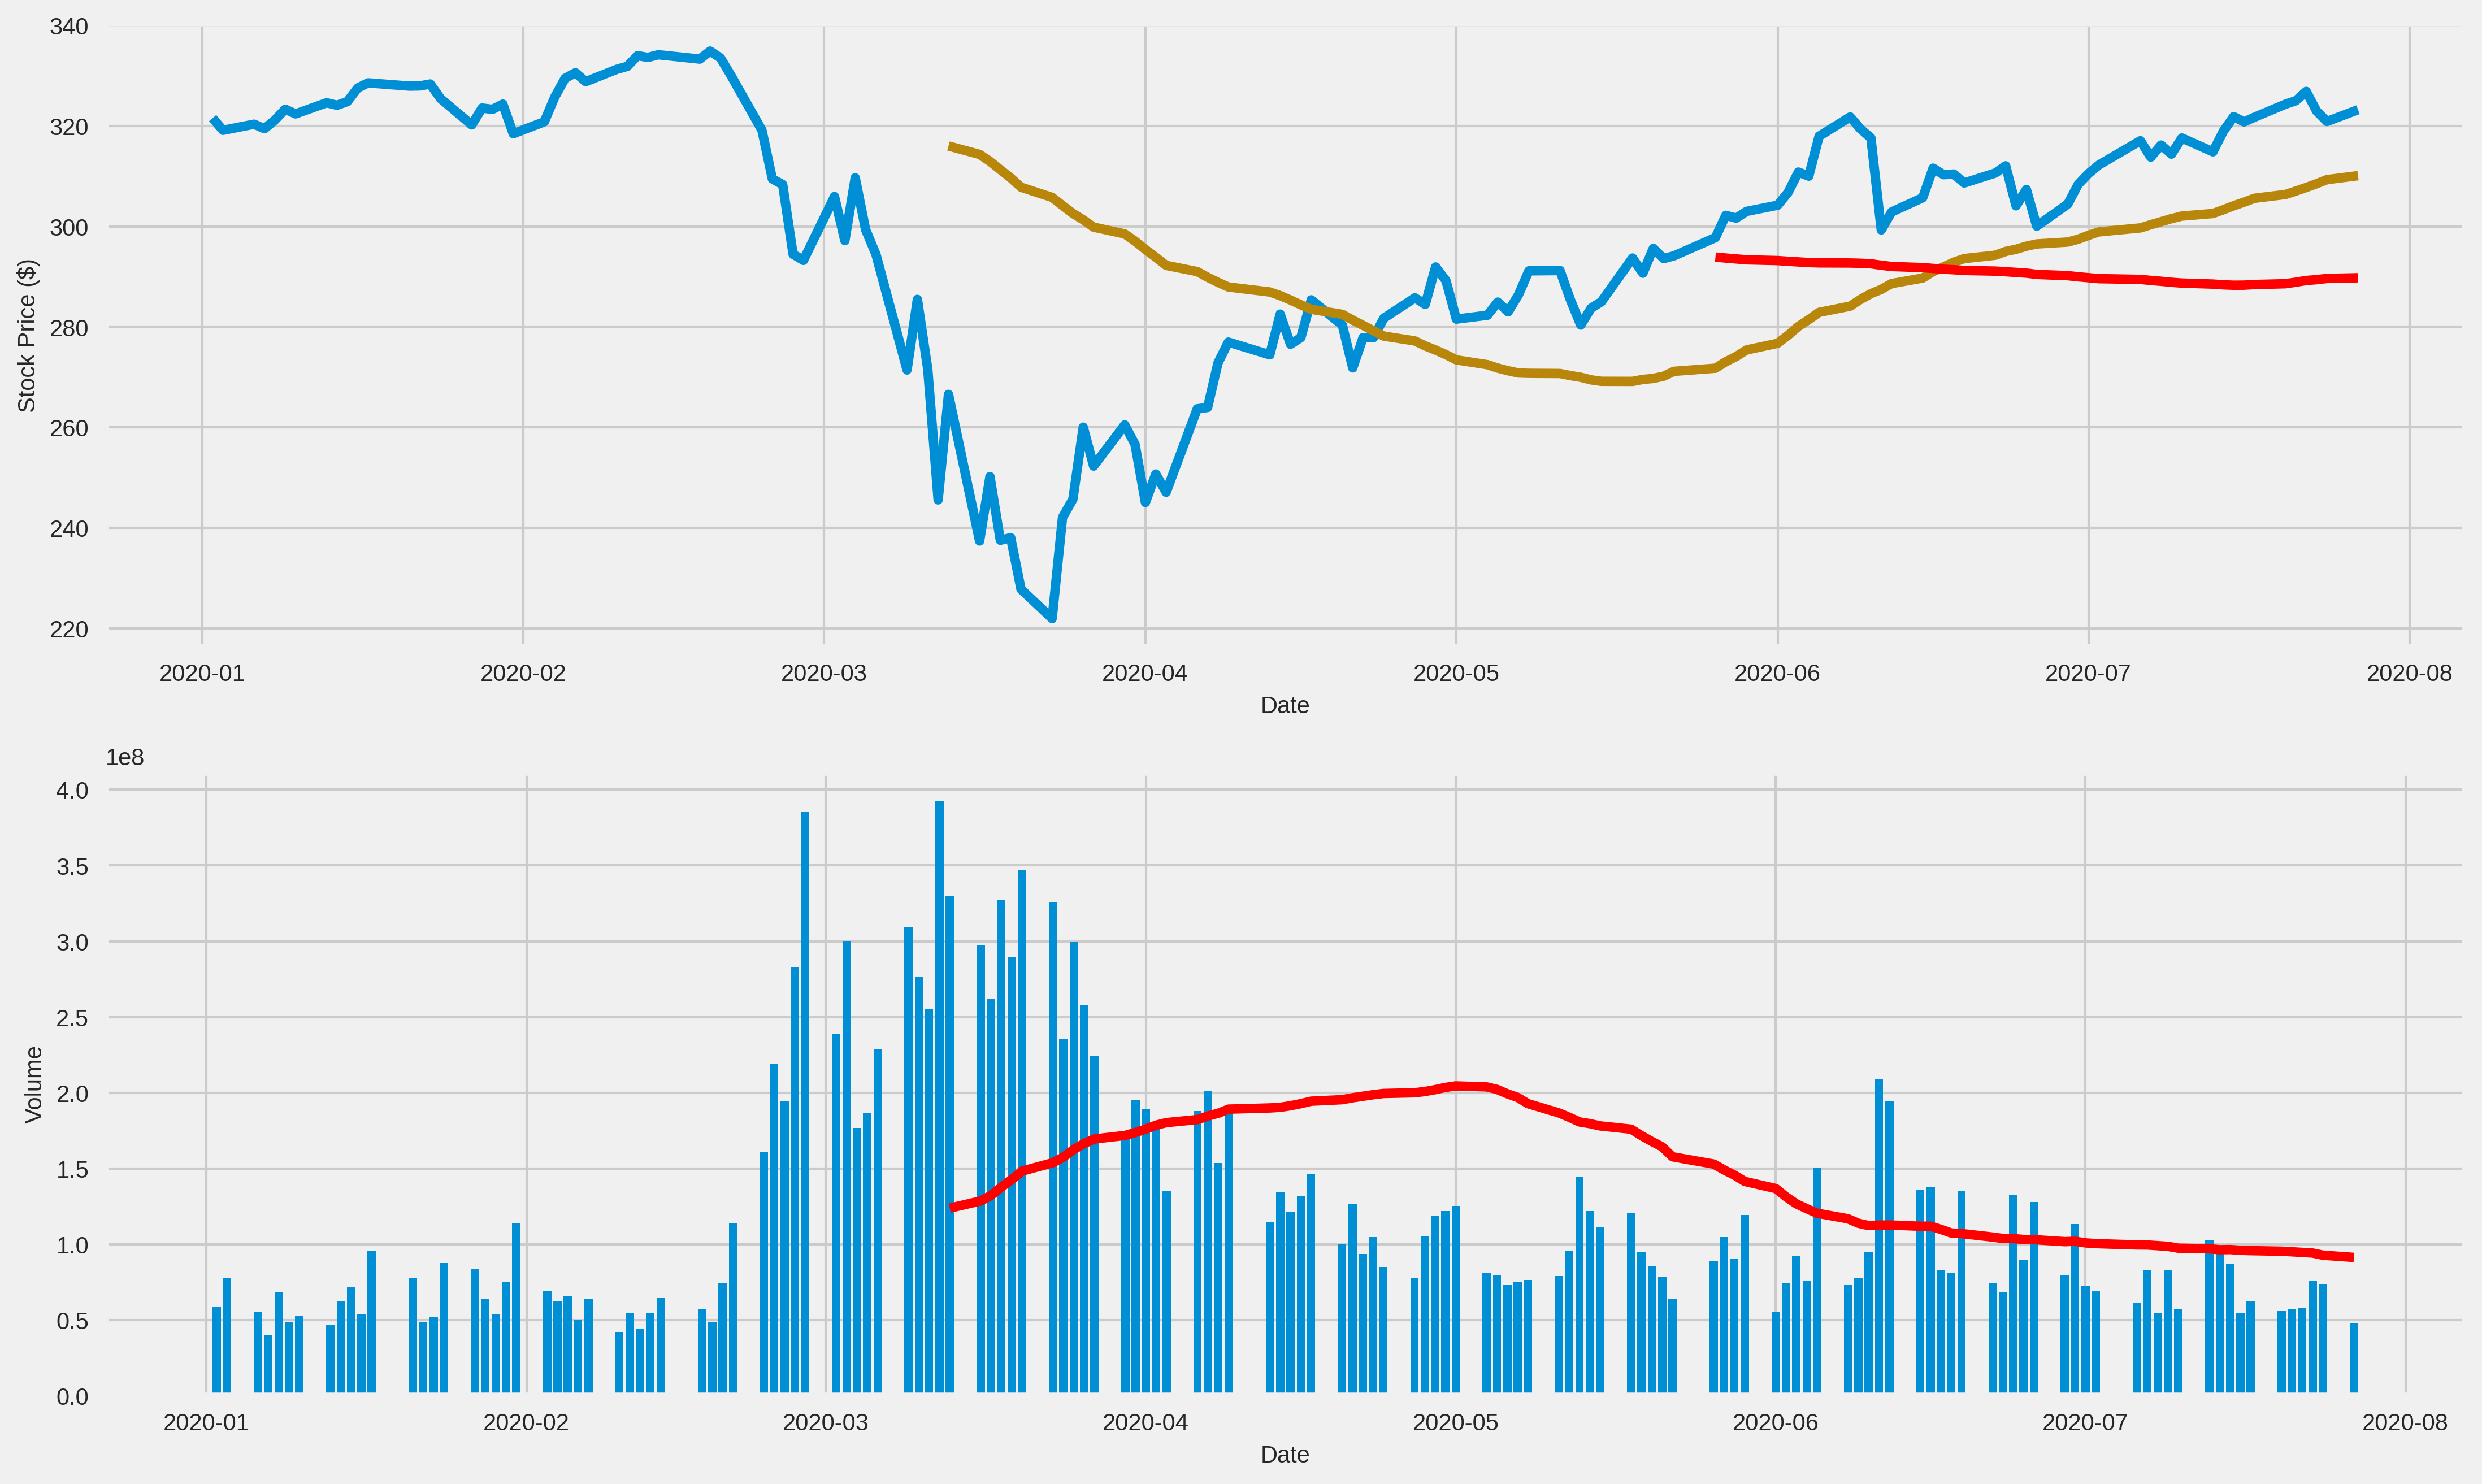

In [11]:
# Plot SPY's price with volume including the 50 and 100 day moving average and the average volume
plt.style.use('fivethirtyeight')                            # Use fivethirtyeight chart style

plt.subplot(211)                                            # SPY's price chart
plt.xlabel('Date', fontsize=10)                             # Label x-axis 
plt.ylabel('Stock Price ($)', fontsize=10)                  # Label y-axis
plt.plot(close, label="SPY's Adjusted Close Price")         # Plot the close prices
plt.plot(sma50_for_chart, 'darkgoldenrod')                  # Plot to 50 SMA
plt.plot(sma100_for_chart, 'r')                             # Plot the 100 SMA

plt.subplot(212)                                            # Volume plot
plt.xlabel('Date', fontsize=10)                             # Label x-axis
plt.ylabel('Volume', fontsize=10)                           # Label y-axis
plt.bar(date, volume)                                       # Plot the volume as a bar chart
plt.plot(date, sma50_for_volume, 'r')                       # Plot the average volume as a 50 day average (the standard in ThinkorSwim)

plt.tight_layout                                            # Tight layout format
plt.show                                                    # Show chart

In [12]:
# Create a training set using SPY's closing prices
training_set = SPY['Adj Close']
training_set = pd.DataFrame(training_set)

In [13]:
# Check if any SPY closing prices were NaN
SPY.isna().any()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [15]:
# Machine Learning
# Transform training set by scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [16]:
# Show SPY's information
SPY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       143 non-null    datetime64[ns]
 1   Open       143 non-null    float64       
 2   High       143 non-null    float64       
 3   Low        143 non-null    float64       
 4   Close      143 non-null    float64       
 5   Adj Close  143 non-null    float64       
 6   Volume     143 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 7.9 KB


In [18]:
# Create data structure with 60 timesteps and 1 output
# Take the data from the first 60 days and start predictions on day 61
# Data from day 1-60 predicts the 61st day and data from day 2-61 predicts the 62nd day and so on
X_train = []
y_train = []

for i in range(60, 143):
  X_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

#reshape the data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [19]:
# Build the recurrent neural network

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [21]:
# Initialize the neural network
#For this time series data, a regression deep learning model is used
regressor = Sequential()

In [22]:
# Train the neural network
# Data is fed to the neural network and trained using random biases/weights to predict future prices
# Four layer model 
# Dropout is a regularisation technique for reducing overfitting a neural network (dropouts units in the neural network)

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

In [24]:
# Compile RNN using the Adam optimizer instead of a classical stochastic gradient descent procedure 
# Adam optimizer uses ADAgrad, a gradient-based optimization algorithm and RMSprop, another gradient-based optimization technique
regressor.compile(optimizer='adam', loss='mean_squared_error')

# Fit the RNN to training set
regressor.fit(X_train, y_train, epochs = 100, batch_size= 32)

Epoch 1/100
3/3 [==============================] - 0s 92ms/step - loss: 0.3604
Epoch 2/100
3/3 [==============================] - 0s 85ms/step - loss: 0.0832
Epoch 3/100
3/3 [==============================] - 0s 97ms/step - loss: 0.0815
Epoch 4/100
3/3 [==============================] - 0s 84ms/step - loss: 0.0276
Epoch 5/100
3/3 [==============================] - 0s 91ms/step - loss: 0.0413
Epoch 6/100
3/3 [==============================] - 0s 83ms/step - loss: 0.0199
Epoch 7/100
3/3 [==============================] - 0s 73ms/step - loss: 0.0237
Epoch 8/100
3/3 [==============================] - 0s 77ms/step - loss: 0.0228
Epoch 9/100
3/3 [==============================] - 0s 78ms/step - loss: 0.0146
Epoch 10/100
3/3 [==============================] - 0s 69ms/step - loss: 0.0174
Epoch 11/100
3/3 [==============================] - 0s 79ms/step - loss: 0.0160
Epoch 12/100
3/3 [==============================] - 0s 87ms/step - loss: 0.0165
Epoch 13/100
3/3 [==============================]

In [25]:
# Download the test data from Yahoo Finance
SPY_test = yf.download('SPY', start='2020-08-01', end='2020-08-13', progress=False)

In [26]:
# Select rows and columns by number using iloc
real_stock_price = SPY.iloc[:, 1:2].values

In [27]:
# Visualize the test data
SPY_test.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-08-03,328.320007,329.619995,327.730011,328.790009,328.790009,53077900
2020-08-04,327.859985,330.059998,327.859985,330.059998,330.059998,41917900
2020-08-05,331.470001,332.390015,331.179993,332.109985,332.109985,42866400
2020-08-06,331.480011,334.459991,331.130005,334.329987,334.329987,43679400
2020-08-07,333.279999,334.880005,332.299988,334.570007,334.570007,57265200


In [28]:
# Show the test data information
SPY_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8 entries, 2020-08-03 to 2020-08-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       8 non-null      float64
 1   High       8 non-null      float64
 2   Low        8 non-null      float64
 3   Close      8 non-null      float64
 4   Adj Close  8 non-null      float64
 5   Volume     8 non-null      int64  
dtypes: float64(5), int64(1)
memory usage: 448.0 bytes


In [29]:
# Create a test set using the closing prices and put it into a dataframe
test_set = SPY_test['Adj Close']
test_set = pd.DataFrame(test_set)

In [49]:
# Show the test set data
test_set

,Adj Close
Date,
2020-08-03,328.790009
2020-08-04,330.059998
2020-08-05,332.109985
2020-08-06,334.329987
2020-08-07,334.570007
2020-08-10,335.570007
2020-08-11,332.799988
2020-08-12,337.440002


In [30]:
# Show the test set information
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8 entries, 2020-08-03 to 2020-08-12
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  8 non-null      float64
dtypes: float64(1)
memory usage: 128.0 bytes


In [67]:
# Getting the predicted closing prices of SPY
# SPY_test info shows 8 entries (8 days worth of data) so use 8 for the range of i in the for loop
SPY_total = pd.concat((SPY['Adj Close'], SPY_test['Adj Close']), axis = 0)

inputs = SPY_total[len(SPY_total) - len(SPY_test) - 1:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []

for i in range(1, 8):
    X_test.append(inputs[i-1:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [68]:
# Create the predicted stock price data frame and show its information 
predicted_stock_price = pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       7 non-null      float32
dtypes: float32(1)
memory usage: 156.0 bytes


Text(0, 0.5, 'Stock Price ($)')

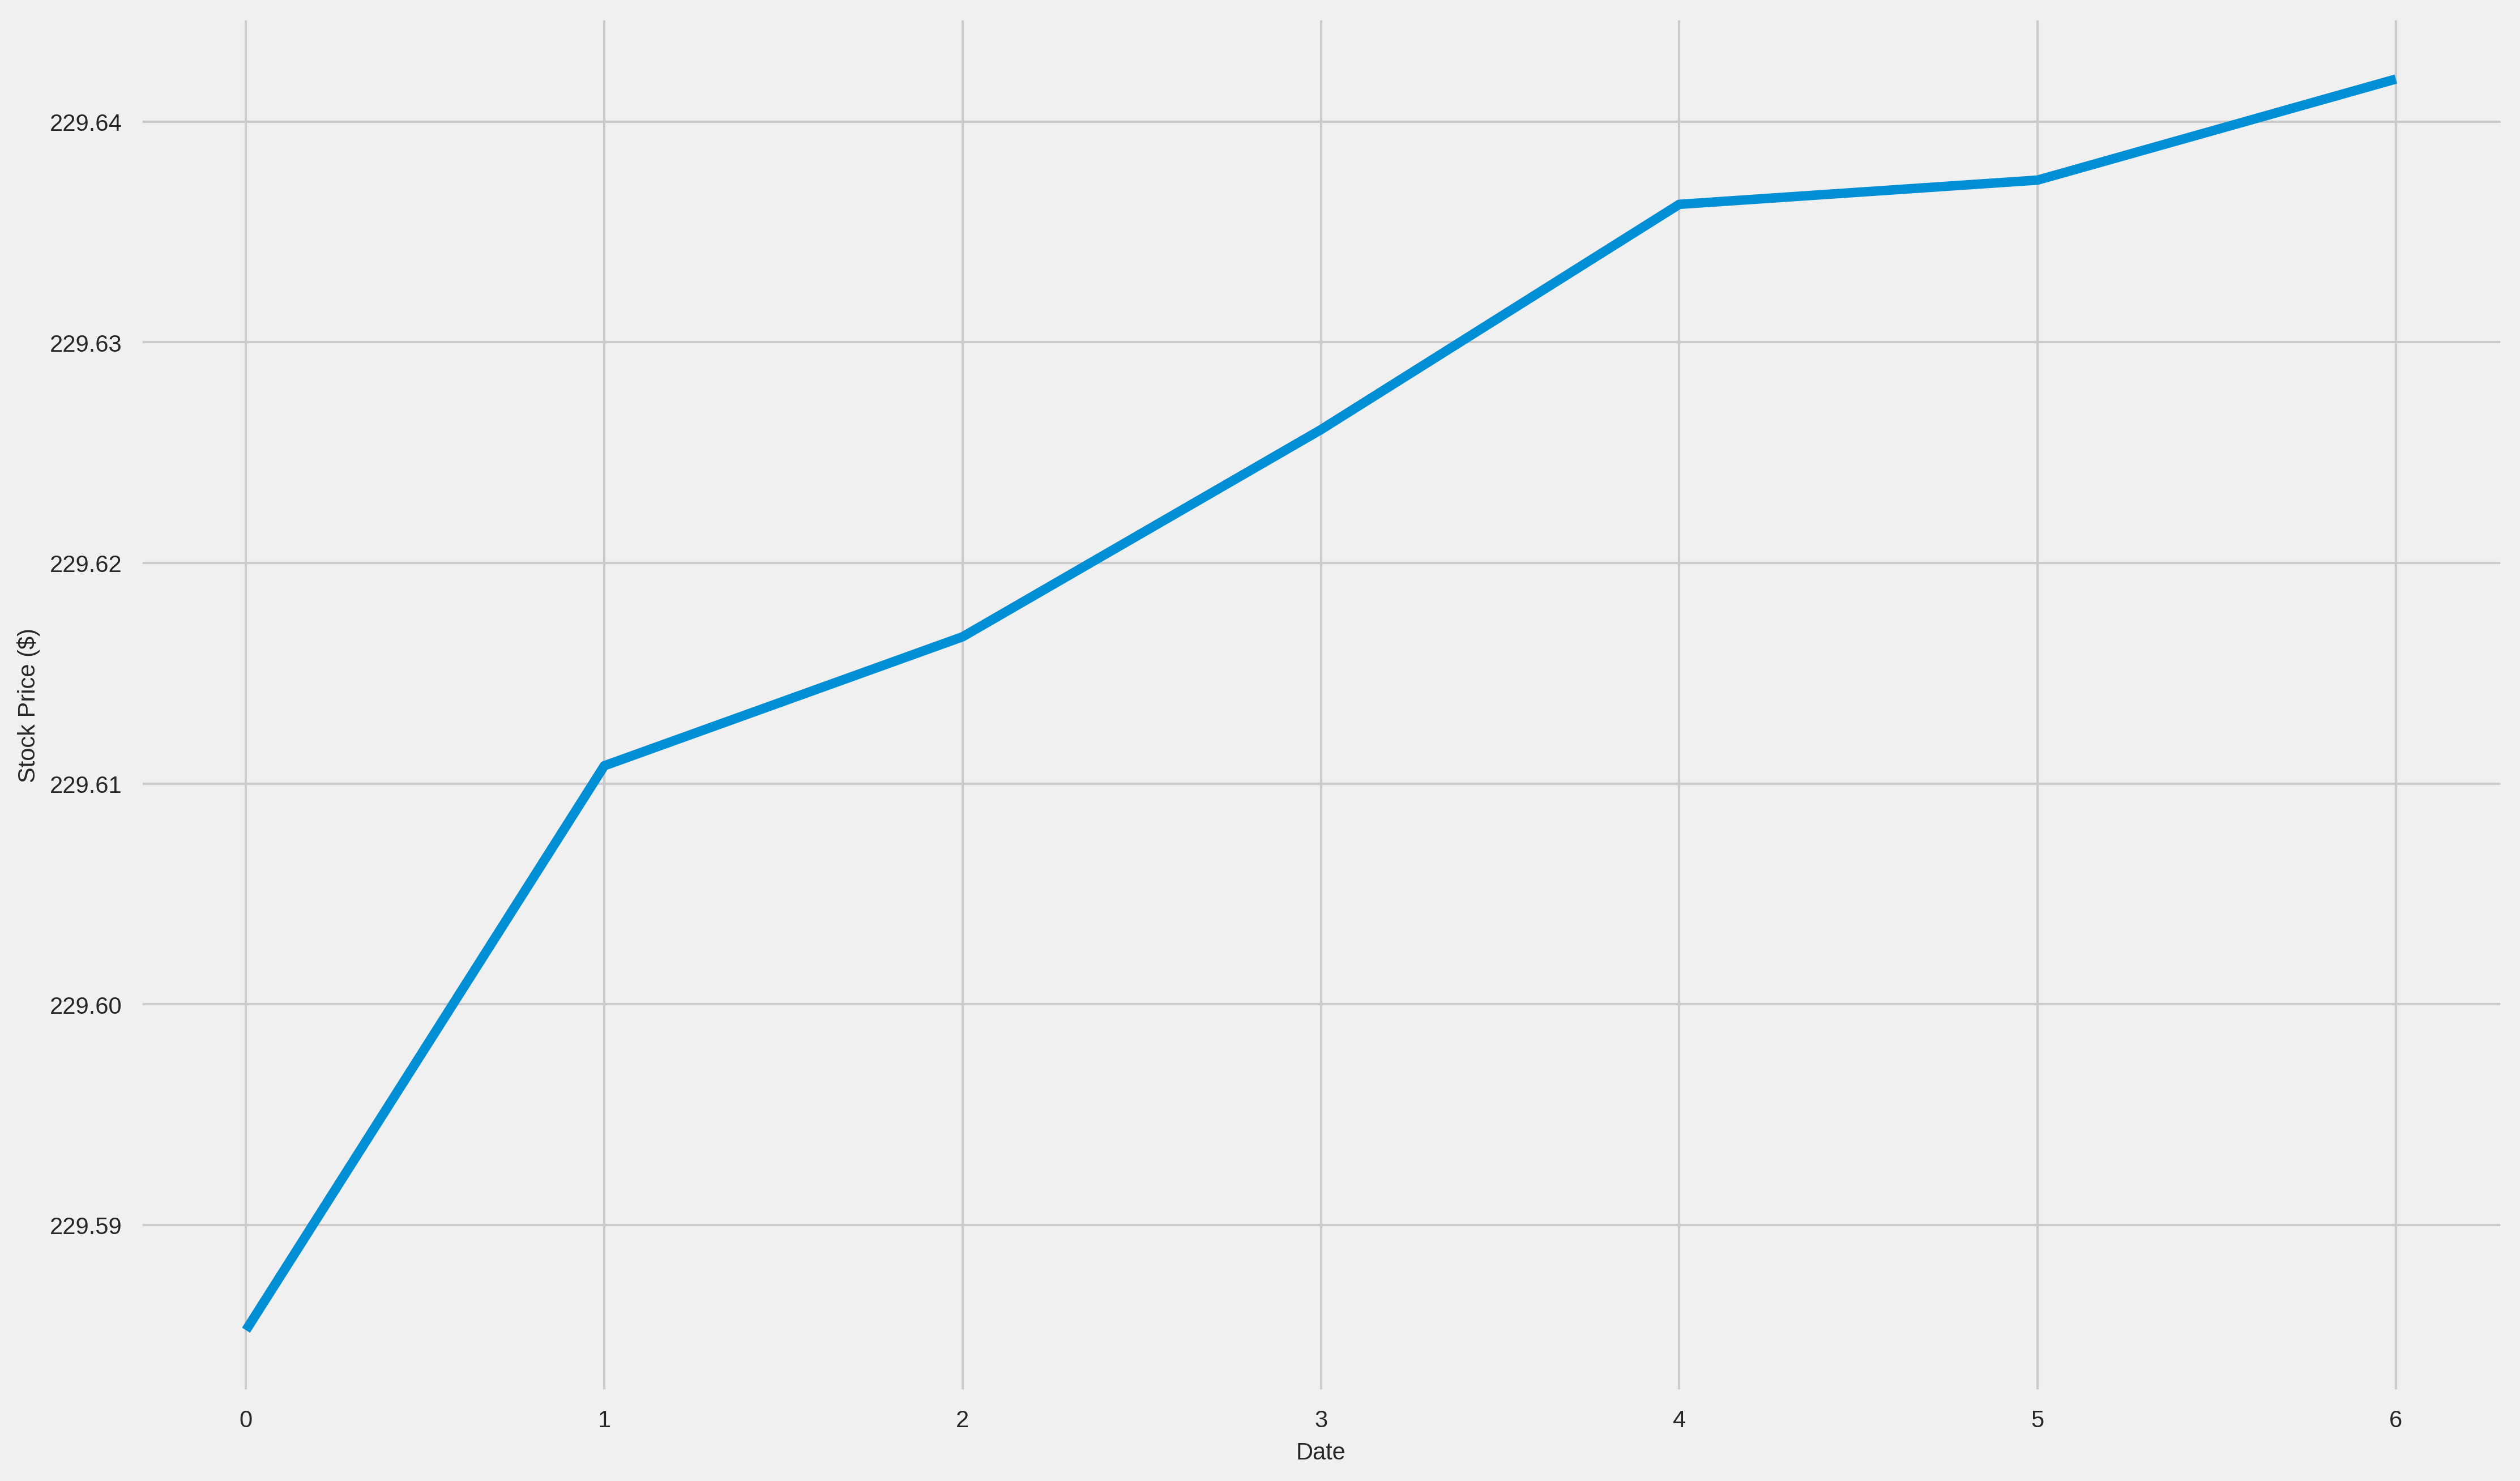

In [79]:
# Plot the predicted stock price 
plt.style.use('fivethirtyeight')                                              # Use fivethirtyeight chart style

plt.plot(predicted_stock_price, label="SPY's Predicted Stock Price")          # Plot the predicted stock price  
plt.xlabel('Date', fontsize=10)                                               # Label x-axis 
plt.ylabel('Stock Price ($)', fontsize=10)                                    # Label y-axis

In [71]:
# Download the actual data from this time period to compare the actual chart to the predicted chart
SPY_actual = yf.download('SPY', start='2020-08-01', end=None, progress=False)
SPY_actual

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-08-03,328.320007,329.619995,327.730011,328.790009,328.790009,53077900
2020-08-04,327.859985,330.059998,327.859985,330.059998,330.059998,41917900
2020-08-05,331.470001,332.390015,331.179993,332.109985,332.109985,42866400
2020-08-06,331.480011,334.459991,331.130005,334.329987,334.329987,43679400
2020-08-07,333.279999,334.880005,332.299988,334.570007,334.570007,57265200
2020-08-10,335.059998,335.769989,332.959991,335.570007,335.570007,44282100
2020-08-11,336.850006,337.540009,332.010010,332.799988,332.799988,69601100
2020-08-12,335.440002,338.279999,335.410004,337.440002,337.440002,53826100
2020-08-13,336.609985,338.250000,335.829987,336.829987,336.829987,41816100


In [72]:
# Create a variable with the actual closing prices for this time period to be plotted
SPY_actual_close = SPY_actual['Adj Close']
SPY_actual_close

Date
2020-08-03    328.790009
2020-08-04    330.059998
2020-08-05    332.109985
2020-08-06    334.329987
2020-08-07    334.570007
2020-08-10    335.570007
2020-08-11    332.799988
2020-08-12    337.440002
2020-08-13    336.829987
2020-08-14    336.839996
Name: Adj Close, dtype: float64

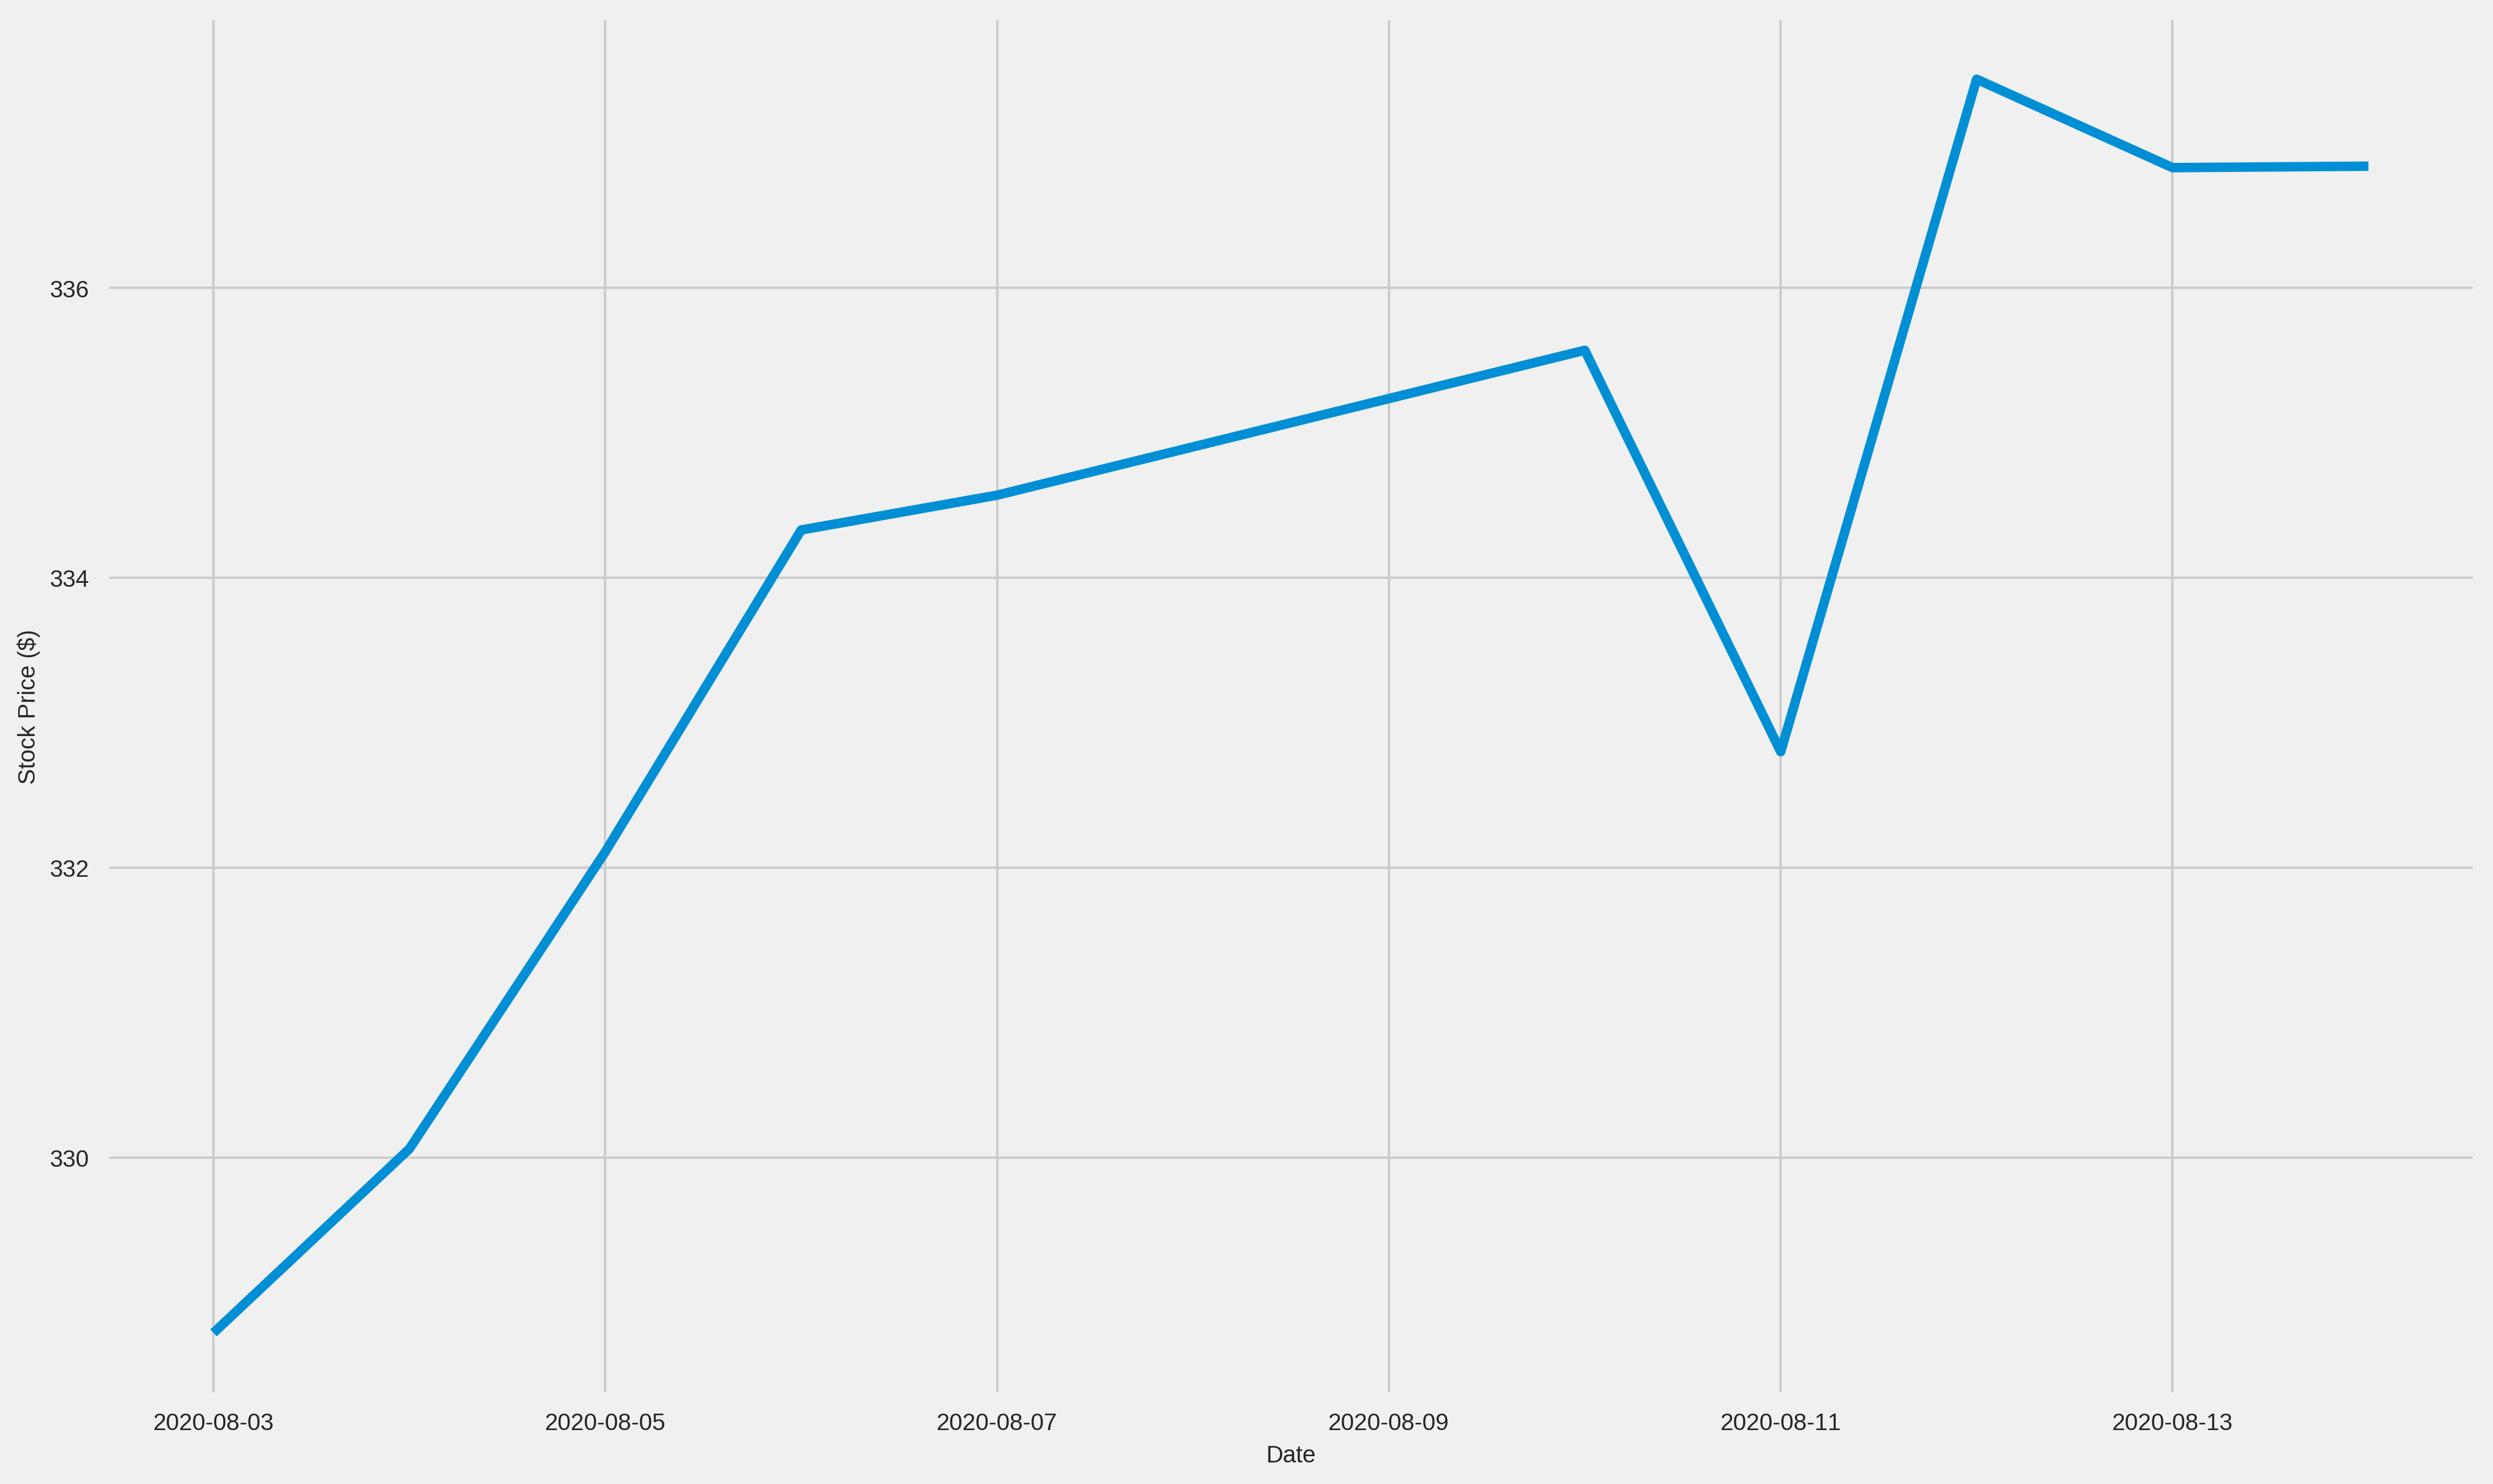

In [73]:
# Plot the actual stock price to compare with the predicted price
plt.style.use('fivethirtyeight')                                    # Use fivethirtyeight chart style

plt.plot(SPY_actual_close, label="SPY's Actual Stock Price")        # Plot the actual stock price                                         
plt.xlabel('Date', fontsize=10)                                     # Label x-axis 
plt.ylabel('Stock Price ($)', fontsize=10)                          # Label y-axis

<function matplotlib.pyplot.show>

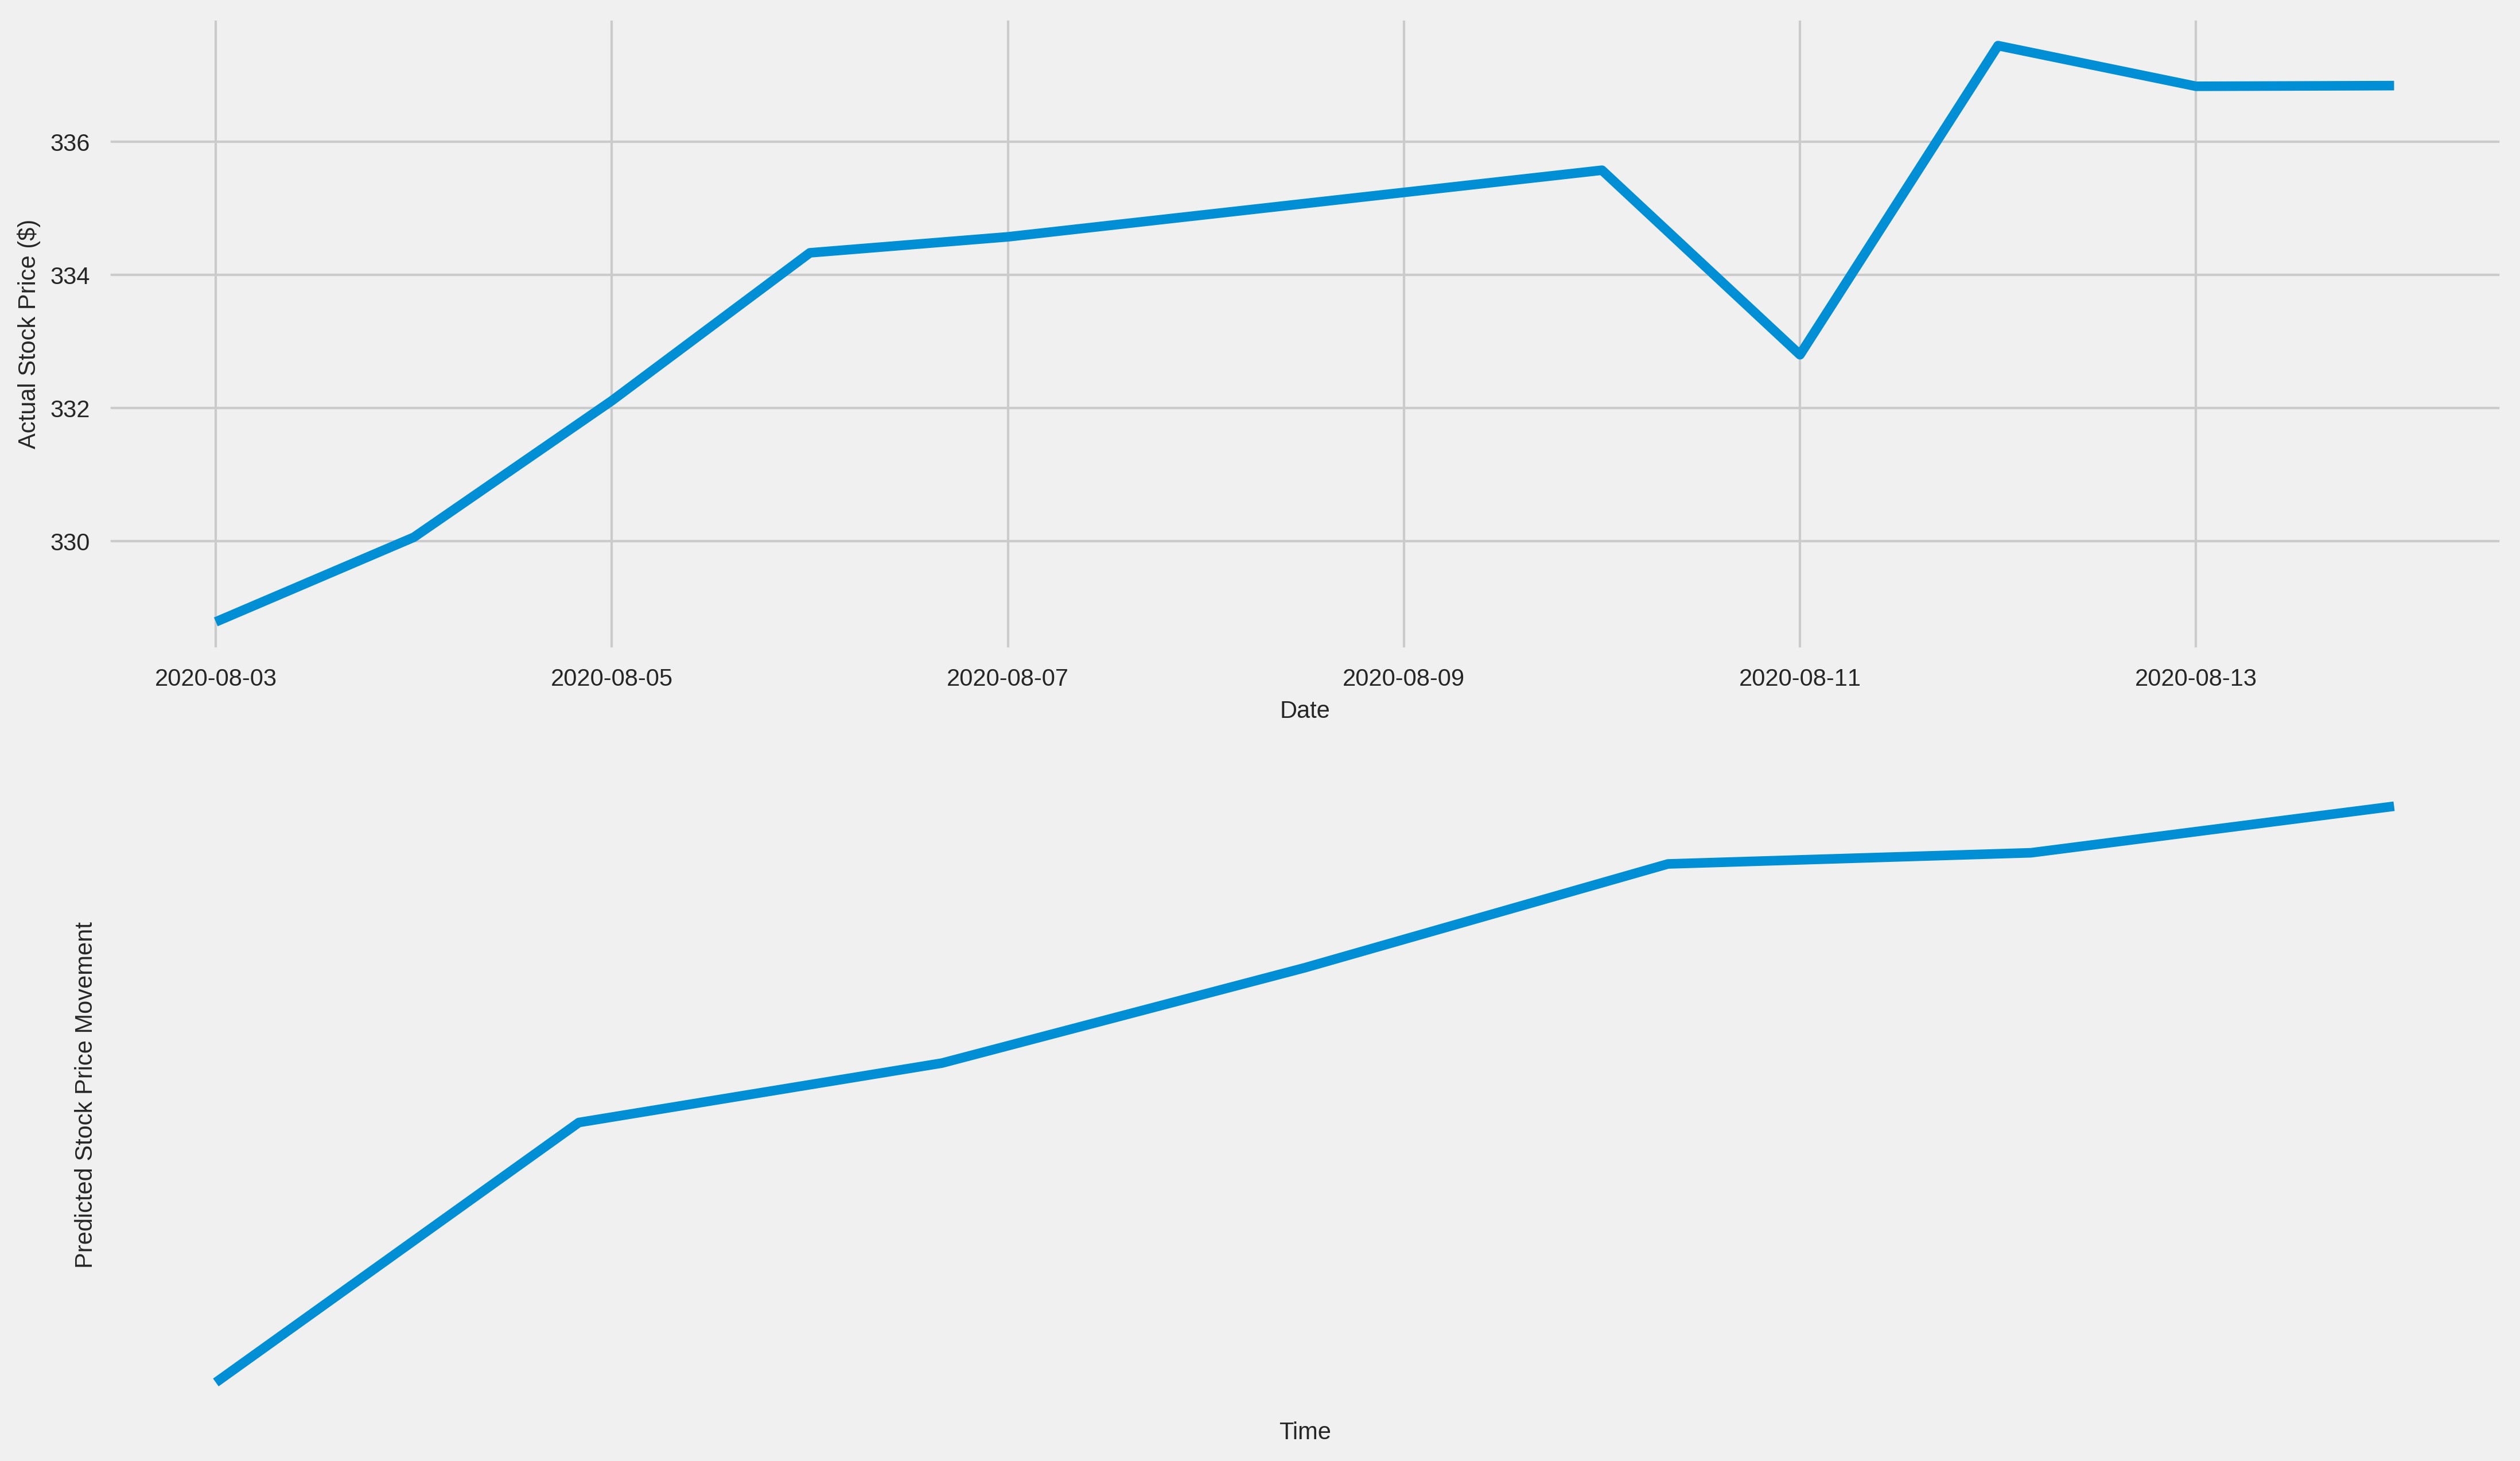

In [78]:
# Visualize the predicted and actual charts together

plt.style.use('fivethirtyeight')                                        # Use fivethirtyeight chart style

plt.subplot(211)                                                        # SPY's actual price chart
plt.plot(SPY_actual_close, label="SPY's Actual Close Prices")           # Plot the actual closing prices
plt.xlabel('Date', fontsize=10)                                         # Label x-axis
plt.ylabel('Actual Stock Price ($)', fontsize=10)                       # Label y-axis

plt.subplot(212)                                                        # SPY's predicted price chart
plt.plot(predicted_stock_price, label="SPY's Actual Close Prices")      # Plot the predicted closing prices
plt.xlabel('Time', fontsize=10)                                         # Label x-axis
plt.ylabel('Predicted Stock Price Movement', fontsize=10)               # Label y-axis
plt.xticks([])
plt.yticks([])

plt.tight_layout                                                        # Tight layout format
plt.show                                                                # Show chart